<a href="https://colab.research.google.com/github/Vishy-A/MachineLearningIntro/blob/main/4105HW2P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
#Vishy Adusumilli
#801185663
#HW 2 P2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Machine Learning/Datasets/Housing.csv'
df = pd.DataFrame(pd.read_csv(file_path))
df.head()
# checking to make sure dataset access works

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [60]:
df.isnull().sum()*100 / df.shape[0]


price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [61]:
vars1a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
vars1b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
varstrings = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
scalervars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

def binarymap(inp):
  return inp.map({'yes' : 1, 'no' : 0})

df[varstrings] = df[varstrings].apply(binarymap)

np.random.seed(0)

scaler = MinMaxScaler()

traindf, testdf = train_test_split(df, train_size = .8, test_size = .2, random_state = 100)

traindf[scalervars] = scaler.fit_transform(traindf[scalervars])
traindf.head()





,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,0.596970,0.432609,0.4,0.000000,0.000000,1,1,1,0,1,0.333333,0,NaN
41,0.527273,0.314954,0.4,0.333333,1.000000,1,0,0,0,1,0.000000,1,NaN
91,0.404242,0.342105,0.2,0.000000,0.000000,1,1,1,0,0,0.666667,1,NaN
118,0.363636,0.319131,0.4,0.000000,0.000000,1,0,1,0,1,0.000000,1,NaN
472,0.109091,0.124896,0.6,0.000000,0.333333,1,0,0,0,0,1.000000,0,NaN


In [62]:
ytrain = traindf.pop('price')
ytest = testdf.pop('price')

xa = traindf[vars1a]
xb = traindf[vars1b]

valxa = testdf[vars1a]
valxb = testdf[vars1b]

trainsize = len(traindf)
valsize = len(testdf)

In [63]:
ones = np.ones((trainsize,1))
x_a = xa.values
x_a = np.hstack((ones, x_a))
x_b = xb.values
x_b = np.hstack((ones, x_b))

y = ytrain.values

theta1a = np.zeros(6)
theta1b = np.zeros(12)

valones = np.ones((valsize,1))
valx_a = valxa.values
valx_a = np.hstack((valones, valx_a))
valx_b = valxb.values
valx_b = np.hstack((valones, valx_b))

valy = ytest.values

In [64]:
def compute_cost(x, y, theta, size):
  prediction = x.dot(theta)
  error = np.subtract(prediction, y)
  sqrError = np.square(error)
  L = 1 / (2 * size) * np.sum(sqrError)

  return L

In [65]:
def grad_descent(x, y, theta, alpha, iterations, xval, yval):
  costhistory = np.zeros(iterations)
  valcosthistory = np.zeros(iterations)
  for i in range(iterations):
    prediction = x.dot(theta)
    error = np.subtract(prediction, y)
    sum_delta = (alpha / trainsize) * x.transpose().dot(error)
    theta = theta - sum_delta
    costhistory[i] = compute_cost(x, y, theta, trainsize)
    valcosthistory[i] = compute_cost(xval, yval, theta, valsize)

  return theta, costhistory, valcosthistory

In [66]:
alpha = .01
iterations = 1500

theta1a, costhistory1a, valcosthistory1a = grad_descent(x_a, y, theta1a, alpha, iterations, valx_a, valy)
theta1b, costhistory1b, valcosthistory1b = grad_descent(x_b, y, theta1b, alpha, iterations, valx_b, valy)

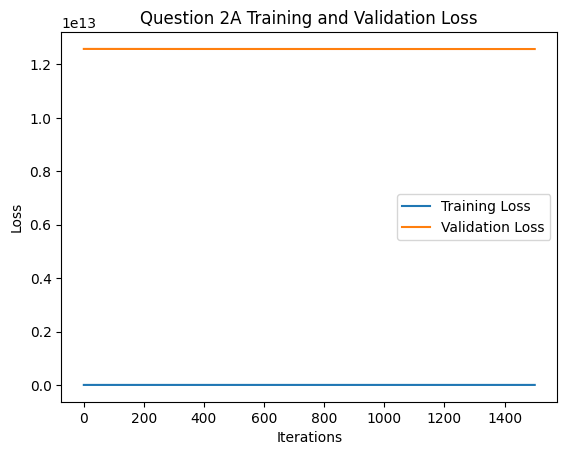

In [67]:
plt.plot(range(1, iterations + 1), costhistory1a, label = "Training Loss")
plt.plot(range(1, iterations + 1), valcosthistory1a, label = "Validation Loss")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Question 2A Training and Validation Loss')
plt.show()

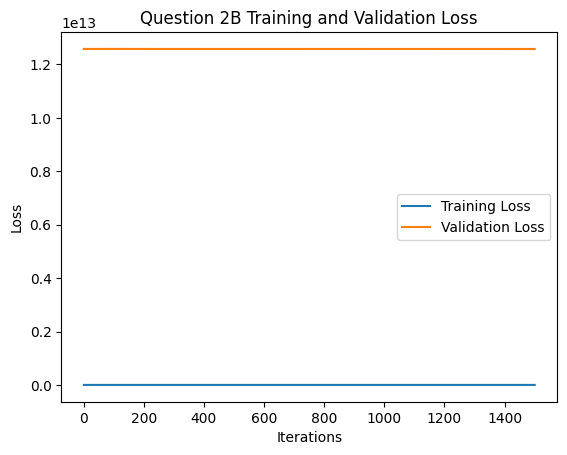

In [68]:
plt.plot(range(1, iterations + 1), costhistory1b, label = "Training Loss")
plt.plot(range(1, iterations + 1), valcosthistory1b, label = "Validation Loss")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Question 2B Training and Validation Loss')
plt.show()